---

##  mplfinance: initial testing of styles and plot customization

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__  # for the record

'0.25.1'

In [3]:
# plots outside the notebook:
#%matplotlib qt     
# plots within the notebook:
%matplotlib inline

---

### Let's read in some daily data for the S&P 500 from November of 2019 

In [4]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,3134.85,3142.69,3131.00,3140.52,986041660
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


---
## Importing mplfinance

In [5]:
import mplfinance as mpf

---
### Plotting open,high,low,close data is as simple as calling `mpf.plot()` on the dataframe

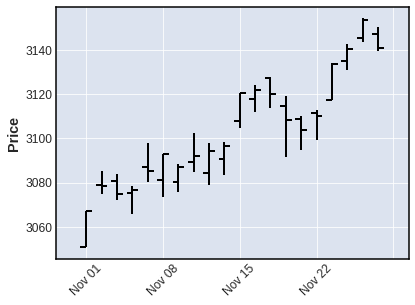

In [6]:
f = mpf.plot(daily)  # the default plot type is 'ohlc'
# f.suptitle('Title Here')
# print('type(f)=',type(f))
# print('id(f)=',id(f))
# import matplotlib.pyplot as plt
# cf = plt.gcf()
# print('type(cf)=',type(cf))
# print('id(cf)=',id(cf))
# f.show()

---

### The default plot type, as you can see above, is `'ohlc'`
  
### Other plot types can be specified with the keyword argument `type`,<br> for example, `type='candle'` or `type='line'`


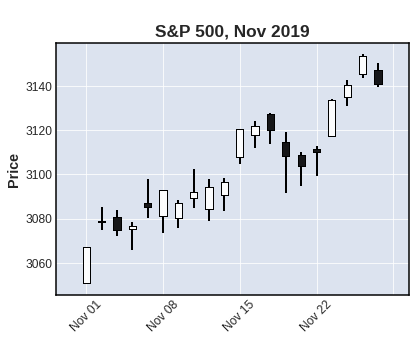

In [7]:
mpf.plot(daily,type='candle',title='\nS&P 500, Nov 2019') # we can plot candlesticks also

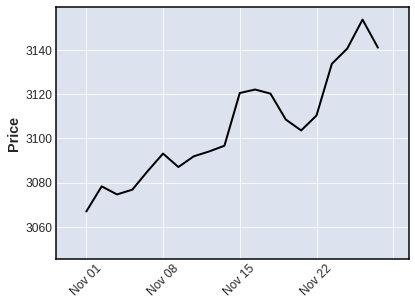

In [8]:
mpf.plot(daily,type='line')

---
## We can also plot moving averages with the `mav` keyword
### &nbsp;&nbsp;&nbsp; - use an integer for a single moving average 
### &nbsp;&nbsp;&nbsp; - use a tuple or list of integers for multiple moving averages

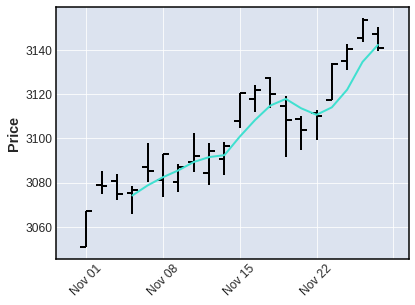

In [9]:
mpf.plot(daily,type='ohlc',mav=4)

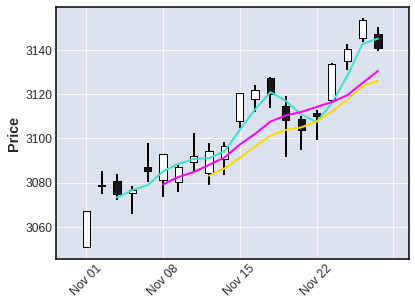

In [10]:
mpf.plot(daily,type='candle',mav=(3,6,9))

In [11]:
# from mplfinance._styles import _get_mpfstyle

# style = _get_mpfstyle('classic')

# # import copy
# # mktcolors = copy.deepcopy(style['marketcolors'])
# # mavcolors = copy.deepcopy(style['mavcolors'])

# mktcolors = style['marketcolors']
# mavcolors = style['mavcolors']

# subd = mktcolors['candle']
# subd
# subd.update({'up':'g','down':'r'})
# subd
# #mktcolors.update({'candle':subd,'volume':'#1f77b4'})

In [12]:
s = mpf.make_custom_style(mavcolors=['red','orange','green','blue','purple'])
s = mpf.make_custom_style()
s = mpf.make_custom_style(base_mpf_style='classic')

AttributeError: module 'mplfinance' has no attribute 'make_custom_style'

In [ ]:
s.keys()

In [ ]:
# m = mpf.make_marketcolors(up='k',down='#0095ff',edge='w',wick='w',ohlc='w',volume='#92aace',alpha=1.0)
# m = mpf.make_marketcolors(up='k',down='#0095ff',edge='w',wick='w',ohlc='w',volume='#7a93b8',alpha=1.0)
# s = mpf.make_custom_style(base_mplstyle='dark_background',marketcolors=m,facecolor='k',
#                           gridcolor='gray',gridstyle='--')
# s = mpf.make_custom_style(base_mplstyle='dark_background',marketcolors=m,gridcolor='#999999',gridstyle='--')
# s = mpf.make_custom_style(base_mplstyle='dark_background',facecolor='#0a0a0a',marketcolors=m,
#                           gridcolor='grey',gridstyle='--')

In [ ]:
mav=(2,3,4,5,6,7,8)
mav=(2,3,4,5)
mpf.plot(daily,type='candle',mav=mav,volume=True,no_xgaps=True)

In [ ]:
#rcd = {'grid.linewidth' : 1.8 }
s = mpf.make_custom_style(base_mpf_style='schwab',base_mpl_style='default')#,rc=rcd)
s = mpf.make_custom_style(base_mpf_style='schwab',base_mpl_style='fast')#,rc=rcd)
s = 'schwab'
mav=(2,4,6,8)
mpf.plot(daily,type='candle',mav=mav,volume=True,style=s,block=False)

In [ ]:
import mplfinance._styledata as sd

In [ ]:
dir(sd)

In [ ]:
[n for n in dir(sd) if not n.startswith('_')]

In [ ]:
from mplfinance._styledata import *

In [ ]:
[n for n in dir() if not n.startswith('_')]

In [ ]:
_sn = ['dark','mike']

for n in _sn:
    ic = f'import mplfinance._styledata.{n} as {n}'
    print('ic="'+ic+'"')

In [ ]:
mav=(2,4,6,8)
mpf.plot(daily,type='candle',mav=mav,volume=True,style='mike',figratio=(11,8),figscale=1.25)

In [ ]:
mc = mpf.make_marketcolors(base_style='mike',up='w',volume='i')
st = mpf.make_custom_style(base_mpf_style='mike',marketcolors=mc)
mpf.plot(daily,type='candle',mav=mav[0:3],volume=True,style=st,figratio=(11,8),figscale=1.25)

In [ ]:
mc = mpf.make_marketcolors(base_style='mike',up='w',volume='i',edge='k',wick='k')
#st = mpf.make_custom_style(base_mplstyle='classic',base_mpf_style='mike',marketcolors=mc)
st = mpf.make_custom_style(base_mpl_style='classic',marketcolors=mc)
mpf.plot(daily,type='candle',mav=mav[0:3],volume=True,style=st,figratio=(11,8),figscale=1.25)

In [ ]:
mpf.plot(daily,type='candle',mav=(2,4),volume=True,no_xgaps=True,
         style='darktest',figratio=(7,5),figscale=1.5,ylabel='OHLC',title='\nS&P 500')

In [ ]:
m = mpf.make_marketcolors(up='lime',down='deeppink',ohlc='inherit',volume='#7a93b8')
st = mpf.make_custom_style(base_mpl_style='dark_background',marketcolors=m)
mpf.plot(daily,type='candle',mav=(2,4),volume=True,no_xgaps=True,
         style=st,figratio=(7,5),figscale=1.5,ylabel='OHLC',title='\nS&P 500')

In [ ]:
len(daily)
daily.head(2)

In [ ]:
opens  = daily['Open'].values
closes = daily['Close'].values
len(opens)
len(closes)

In [ ]:
c = mpf._utils._updown_colors('g','r',opens,closes,True)
len(c)
#c

In [ ]:
import math
math.sin(2)

In [ ]:
#m = mpf.make_marketcolors(up='lime',down='deeppink',ohlc='inherit',edge='inherit',wick='inherit',volume='cyan')
#m = mpf.make_marketcolors()
#m = mpf.make_marketcolors(up='lightgreen',down='skyblue',wick='i',edge='in',volume='inh')
m = mpf.make_marketcolors(up='springgreen',down='deeppink',wick='i',edge='in',volume='inh') # vcdocodp
# vcolor_per_codprice=[True|False] default = False
#s = mpf.make_custom_style(base_mpf_style='dark',marketcolors=m)
#s = mpf.make_custom_style(marketcolors=m)
rcp = {'ytick.labelright':True,'ytick.right':True,'ytick.labelleft':False,'ytick.left':False}
s = mpf.make_custom_style(base_mpf_style='dark',marketcolors=m,rc=rcp)
y1 = [ v*math.sin(v) for v in daily['Volume'].values]
y2 = [ v*math.cos(v) for v in daily['Volume'].values]
y3 = [ v*(0.00000003*math.cos(v*0.5)) + 3100 for v in daily['Volume'].values]
p = [mpf.make_addplot(y1,panel='lower'),
     mpf.make_addplot(y2,panel='lower'),
     mpf.make_addplot(y3)#,panel='lower')
    ]
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,style=s,addplot=p)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,addplot=p)
mpf.plot(daily,type='candle',no_xgaps=True,addplot=p,style=s)
#mpf.plot(daily,type='candle',no_xgaps=True,addplot=p,style=s)

In [ ]:
import matplotlib as mpl
mpl.style.available

In [ ]:
m = mpf.make_marketcolors(up='springgreen',down='deeppink',wick='i',edge='in',volume='inh') # vcdocodp
#m = mpf.make_marketcolors(base_style='classic') # vcdocodp
#s = mpf.make_custom_style(base_mplstyle='grayscale')#,marketcolors=m)#,rc=rcp)
upcolor='darkslategray'
#-upcolor='navy'
#m = mpf.make_marketcolors(up=upcolor,down='red',wick='i',edge='in',volume='inh')
s = mpf.make_custom_style(base_mpl_style='fivethirtyeight',marketcolors=m,base_mpf_style='darktest')#,rc=rcp)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,style=s,addplot=p)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,addplot=p)
mpf.plot(daily,type='candle',volume=True,style=s,addplot=p[0:3])

In [ ]:
mpf.plot(daily,type='candle',volume=True,style=s)#,addplot=p[0])

In [ ]:
mpf.plot(daily,type='candle',volume=True,style='mike',figratio=(14,9),figscale=0.9)

In [ ]:
mpf.plot(daily,type='candle',volume=True,style='dark',figratio=(14,9),figscale=0.9)

In [ ]:
import mplfinance._styledata as sd

In [ ]:
type(sd)
dir(sd)

In [ ]:
[s for s in dir(sd) if not s.startswith('_')]

In [ ]:
sd.mike
type(sd.mike.style)

In [ ]:
mpf.available_styles()

In [ ]:
import importlib

In [ ]:
import mplfinance._styledata as sdefs
type(sdefs)
dir(sdefs)

In [ ]:
s = 'sdefs.classic'
classic = importlib.reload(eval(s))

In [ ]:
type(classic)

In [ ]:
classic.style

In [ ]:
s = mpf.make_custom_style(base_mpf_style='classic')
s

In [ ]:
for key in classic.style.keys():
    print(key,':\n classic=',classic.style[key],'\n s......=',s[key],'\n')

In [ ]:
s == classic.style

In [ ]:
for key in s.keys():
    print(key,':\n classic=',classic.style[key],'\n s......=',s[key],'\n')

In [ ]:
s['base_mpf_style']

In [ ]:
classic.style['base_mpf_style']

In [ ]:
m = mpf.make_marketcolors()

In [ ]:
m

In [ ]:
# print('---')
# m = mpf.make_marketcolors(base_style='classic',down='limegreen',
#                           ohlc='w',volume='k',wick='g')
# m
print('---')
m = mpf.make_marketcolors(base_style='dark',down='limegreen')#, volume='k',wick='g')
m

In [ ]:
from mplfinance._styles import _get_mpfstyle
style = _get_mpfstyle('classic')
style['marketcolors']

In [ ]:
style = _get_mpfstyle('dark')
style['marketcolors']

In [ ]:
from mplfinance._styledata import classic

In [ ]:
dir(classic)

In [ ]:
import copy
s = copy.deepcopy(classic.style)
del s['marketcolors']['wick']
#s

In [ ]:
STOP HERE

In [ ]:
intraday = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

In [ ]:
iday = intraday.loc['2019-11-06 15:00':'2019-11-06 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

In [ ]:
iday = intraday.loc['2019-11-05':'2019-11-06',:]
mpf.plot(iday,type='candle')

In [ ]:
mpf.plot(iday,type='candle',no_xgaps=False)

In [ ]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

In [ ]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40),figscale=0.75)

In [ ]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40))